[markdown記法](https://qiita.com/tbpgr/items/989c6badefff69377da7)

[米国データサイエンティストがやさしく教えるデータサイエンスのためのPython講座](https://www.udemy.com/course/ds_for_python/learn/lecture/21614968#overview)

# その他データサイエンスに使えるライブラリ

In [2]:
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## glob
ワイルドカードを使ってファイル（パス）名のリストを取得する

In [2]:
glob('public-covid-data/*')

['public-covid-data/rp_msk', 'public-covid-data/rp_im']

## osとpathlib
- os.path.split()
- os.path.join()
- os.path.exists()
- os.path.mkdirs()

In [3]:
import os
from pathlib import Path

### 練習

In [4]:
p = Path('public-covid-data/')

In [52]:
p

PosixPath('public-covid-data')

In [31]:
list(p.iterdir())

[PosixPath('public-covid-data/rp_msk'), PosixPath('public-covid-data/rp_im')]

In [32]:
sub_p = list(p.iterdir())[0]

In [34]:
list(sub_p.iterdir())

[PosixPath('public-covid-data/rp_msk/3.nii.gz'),
 PosixPath('public-covid-data/rp_msk/1.nii.gz'),
 PosixPath('public-covid-data/rp_msk/9.nii.gz'),
 PosixPath('public-covid-data/rp_msk/2.nii.gz'),
 PosixPath('public-covid-data/rp_msk/6.nii.gz'),
 PosixPath('public-covid-data/rp_msk/8.nii.gz'),
 PosixPath('public-covid-data/rp_msk/7.nii.gz'),
 PosixPath('public-covid-data/rp_msk/4.nii.gz'),
 PosixPath('public-covid-data/rp_msk/5.nii.gz')]

In [37]:
target_file = list(sub_p.glob('*[6-9]*'))[0]

In [40]:
folder_p, file_name = os.path.split(target_file)

In [41]:
folder_p

'public-covid-data/rp_msk'

In [42]:
file_name

'9.nii.gz'

### os.path.join()
pathの連結

In [43]:
os.path.join(folder_p, file_name)

'public-covid-data/rp_msk/9.nii.gz'

### フォルダの作成

In [47]:
# public-covid-data/new_folder を作成

p = Path('public-covid-data/')
new_folder_name = 'new_folder'
new_folder_path = os.path.join(p, new_folder_name)
new_folder_path

'public-covid-data/new_folder'

### os.path.exists()
ファイルまたはディレクトリの存在確認

In [49]:
os.path.exists(new_folder_path)

False

### os.makedirs()

In [50]:
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

## tqdm
プログレスバーを表示する

In [45]:
from tqdm import tqdm

In [55]:
tqdm()

0it [00:00, ?it/s]

In [59]:
import time
sum_ = 0

before = time.time()
for i in tqdm(range(int(1e7))):
    sum_ += 1
print(sum_)
after = time.time()

print('it took {}'.format(after - before))

100%|██████████| 10000000/10000000 [00:01<00:00, 6373126.99it/s]

10000000
it took 1.5717971324920654


In [131]:
# データフレームを作成
# columns: path_im, filename, path_msk
# path_im -> 'public-covid-data/rp_im/5.nii.gz'
# filename -> '5.nii.gz'
# path_msk -> 'public-covid-data/rp_msk/5.nii.gz'

p = Path('public-covid-data')
sub_p_msk, sub_p_im = list(p.glob('rp_*'))
filename_list = []
path_msk_list = []
path_im_list = []
for _ in list(sub_p_msk.iterdir()):
    _, file_name = os.path.split(_)
    path_msk_list.append(os.path.join(sub_p_msk, file_name))
    path_im_list.append(os.path.join(sub_p_im, file_name))
    filename_list.append(file_name)

data = {'path_im': path_im_list, 'filename': filename_list, 'path_msk': path_msk_list}
df = pd.DataFrame(data)
df

,path_im,filename,path_msk
0,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
1,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
2,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz
3,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
4,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
5,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
8,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz


In [6]:
# 別解

p = Path('public-covid-data')
df_list = []
for folder in p.iterdir():
    file_list = [os.path.split(p)[1] for p in list(folder.iterdir())]
    path_list = [p.as_posix() for p in list(folder.iterdir())]
    df_list.append(pd.DataFrame({'path':path_list, 'filename': file_list}))

df = df_list[0].merge(df_list[2], on='filename',suffixes=('_msk', '_im'))
df

,path_msk,filename,path_im
0,public-covid-data/rp_msk/3.nii.gz,3.nii.gz,public-covid-data/rp_im/3.nii.gz
1,public-covid-data/rp_msk/1.nii.gz,1.nii.gz,public-covid-data/rp_im/1.nii.gz
2,public-covid-data/rp_msk/9.nii.gz,9.nii.gz,public-covid-data/rp_im/9.nii.gz
3,public-covid-data/rp_msk/2.nii.gz,2.nii.gz,public-covid-data/rp_im/2.nii.gz
4,public-covid-data/rp_msk/6.nii.gz,6.nii.gz,public-covid-data/rp_im/6.nii.gz
5,public-covid-data/rp_msk/8.nii.gz,8.nii.gz,public-covid-data/rp_im/8.nii.gz
6,public-covid-data/rp_msk/7.nii.gz,7.nii.gz,public-covid-data/rp_im/7.nii.gz
7,public-covid-data/rp_msk/4.nii.gz,4.nii.gz,public-covid-data/rp_im/4.nii.gz
8,public-covid-data/rp_msk/5.nii.gz,5.nii.gz,public-covid-data/rp_im/5.nii.gz


In [134]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    print('image path for {} is here {}'.format(row['path_im'], row['filename']))

100%|██████████| 9/9 [00:00<00:00, 6194.41it/s]

image path for public-covid-data/rp_im/3.nii.gz is here 3.nii.gz
image path for public-covid-data/rp_im/1.nii.gz is here 1.nii.gz
image path for public-covid-data/rp_im/9.nii.gz is here 9.nii.gz
image path for public-covid-data/rp_im/2.nii.gz is here 2.nii.gz
image path for public-covid-data/rp_im/6.nii.gz is here 6.nii.gz
image path for public-covid-data/rp_im/8.nii.gz is here 8.nii.gz
image path for public-covid-data/rp_im/7.nii.gz is here 7.nii.gz
image path for public-covid-data/rp_im/4.nii.gz is here 4.nii.gz
image path for public-covid-data/rp_im/5.nii.gz is here 5.nii.gz


## nibabel
NIfTI(Neroimagein Informatics Technology Initiative)をPythonで扱う
NIfTIは、主に脳のMRI画像のデータ形式に使われている

In [4]:
import nibabel as nib

### nib.load()
- .get_fdata()

In [7]:
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]

In [8]:
def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)

    return data

In [9]:
data_im = load_nifti(path_im)
data_msk = load_nifti(path_msk)

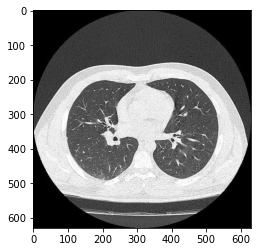

In [11]:
plt.imshow(data_im[200], cmap='gray')

In [15]:
# 0: background 1: ground-glass (GGO: すりガラス影) 2: Consolidation 3: pleaural effusion (胸水)
np.unique(data_msk[200])

array([0., 1.])

In [27]:
df['path_im']

0    public-covid-data/rp_im/3.nii.gz
1    public-covid-data/rp_im/1.nii.gz
2    public-covid-data/rp_im/9.nii.gz
3    public-covid-data/rp_im/2.nii.gz
4    public-covid-data/rp_im/6.nii.gz
5    public-covid-data/rp_im/8.nii.gz
6    public-covid-data/rp_im/7.nii.gz
7    public-covid-data/rp_im/4.nii.gz
8    public-covid-data/rp_im/5.nii.gz
Name: path_im, dtype: object

In [47]:
slice_num = []
for idx in tqdm(range(len(df['path_im'])), total=len(df)):
    path_im = df['path_im'].iloc[idx]
    data = load_nifti(path_im)
    slice_num.append(data.shape[0])

df['slice_num'] = slice_num

100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


In [46]:
# 別解
df['slice_num'] = np.nan
for idx, row in tqdm(df.iterrows(), total=len(df)):
    data = load_nifti(row['path_im'])
    slice_num = data.shape[0]
    df.loc[idx, 'slice_num'] = slice_num

100%|██████████| 9/9 [00:03<00:00,  2.68it/s]


In [43]:
df

,path_msk,filename,path_im,slice_num
0,public-covid-data/rp_msk/3.nii.gz,3.nii.gz,public-covid-data/rp_im/3.nii.gz,418.0
1,public-covid-data/rp_msk/1.nii.gz,1.nii.gz,public-covid-data/rp_im/1.nii.gz,45.0
2,public-covid-data/rp_msk/9.nii.gz,9.nii.gz,public-covid-data/rp_im/9.nii.gz,93.0
3,public-covid-data/rp_msk/2.nii.gz,2.nii.gz,public-covid-data/rp_im/2.nii.gz,39.0
4,public-covid-data/rp_msk/6.nii.gz,6.nii.gz,public-covid-data/rp_im/6.nii.gz,42.0
5,public-covid-data/rp_msk/8.nii.gz,8.nii.gz,public-covid-data/rp_im/8.nii.gz,45.0
6,public-covid-data/rp_msk/7.nii.gz,7.nii.gz,public-covid-data/rp_im/7.nii.gz,42.0
7,public-covid-data/rp_msk/4.nii.gz,4.nii.gz,public-covid-data/rp_im/4.nii.gz,39.0
8,public-covid-data/rp_msk/5.nii.gz,5.nii.gz,public-covid-data/rp_im/5.nii.gz,66.0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='slice_num', ylabel='Density'>

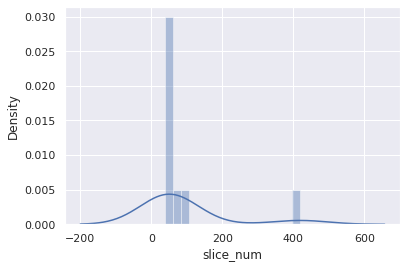

In [50]:
sns.distplot(df['slice_num'])

## multiprocessing 並列処理

In [59]:
from multiprocessing import Pool, cpu_count
import time

### map()
multiprocessingで使う

In [53]:
def square(n):
    return n ** 2

params = [1, 2, 3, 4]
list(map(square, params))

[1, 4, 9, 16]

### Pool.map()とPool.imap()

In [56]:
# cpuの使える数を返す
cpu_count()

12

In [60]:
p = Pool(processes = cpu_count()-1)

def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

直列の場合

In [65]:
before = time.time()
results = list(map(wait_sec, [1, 5, 3]))
after = time.time()
print('it took {} sec'.format(after - before))

it took 9.00928521156311 sec


並列の場合

In [67]:
before = time.time()
results = p.map(wait_sec, [1, 5, 3])
after = time.time()
print('it took {} sec'.format(after - before))

it took 5.006507158279419 sec


imapの場合

In [69]:
before = time.time()
results = list(tqdm(p.imap(wait_sec, [1, 5, 3]), total = 3))
# for i in p.imap(wait_sec, [1, 5, 3]):
#     print('{}: {} sec'.format(i, time.time() - before))
after = time.time()
print('it took {} sec'.format(after - before))

100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

it took 5.0082786083221436 sec


In [72]:
# p.imap_unordered()で処理が終わった順に表示
before = time.time()
for i in p.imap_unordered(wait_sec, [1, 5, 3]):
    print('{}: {} sec'.format(i, time.time() - before))
after = time.time()
print('it took {} sec'.format(after - before))

1: 1.001826524734497 sec
9: 3.0041730403900146 sec
25: 5.006042957305908 sec
it took 5.006279230117798 sec


In [75]:
def multiply(a, b):
    return a * b

def wrap_multiply(args):
    return multiply(*args)

param1 = [1, 2, 3, 4]
param2 = [10, 30, 70, 20]
job_args = list(zip(param1, param2))
# zip()関数で同じインデックスをタプルにしたリストを作成
# [(1, 10), (2, 30), (3, 70), (4, 20)]

p = Pool(processes=cpu_count()-1)
results = list(p.imap(wrap_multiply, job_args))

p.close()
p.join()

In [76]:
results

[10, 60, 210, 80]

## autoreload
Pythonスクリプトを別ファイルに保存してJupyterで読み込むときに
  
**自動で別ファイルをリロードしてくれる**

In [80]:
%load_ext autoreload
%autoreload 2
# autoreload 2 で自動リロード

from util import multiply2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
multiply2(3,2)

6